# Analysis
This notebook contains all the plots used in the report. Therefore, we avoid any explanations and discussion within this notebook and reference to the dedicated report

## Imports

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

## Visualizations

In [79]:
df_baseline = pd.read_csv('./results/results_baseline.csv')
df_no_fed = pd.read_csv('./results/results_no_fed.csv')
df_federated_2_clients = pd.read_csv('./results/results_federated_2_clients.csv')
df_federated_5_clients = pd.read_csv('./results/results_federated_5_clients.csv')
df_federated_8_clients = pd.read_csv('./results/results_federated_8_clients.csv')
df_federated_10_clients = pd.read_csv('./results/results_federated_10_clients.csv')
df_federated_10_clients_old = pd.read_csv('./results/results_federated_10_clients_old.csv')
df_federated_15_clients = pd.read_csv('./results/results_federated_15_clients.csv')

### Final results as table

In [83]:
last_row_baseline = df_baseline.iloc[-1]
last_row_no_fed = df_no_fed.iloc[-1]
last_row_federated_2_clients = df_federated_2_clients.iloc[-1]
last_row_federated_5_clients = df_federated_5_clients.iloc[-1]
last_row_federated_8_clients = df_federated_8_clients.iloc[-1]
last_row_federated_10_clients = df_federated_10_clients.iloc[-1]
last_row_federated_10_clients_old = df_federated_10_clients_old.iloc[-1]
last_row_federated_15_clients = df_federated_15_clients.iloc[-1]

df_combined = pd.DataFrame({
    'baseline': last_row_baseline,
    'no_fed': last_row_no_fed,
    'federated_2_clients': last_row_federated_2_clients,
    'federated_5_clients': last_row_federated_5_clients,
    'federated_8_clients': last_row_federated_8_clients,
    'federated_10_clients': last_row_federated_10_clients,
    'federated_10_clients_old': last_row_federated_10_clients_old,
    'federated_15_clients': last_row_federated_15_clients
}).T

df_combined.index.name = 'setup'
display(df_combined[['accuracy', 'f1', 'precision', 'recall']])

,accuracy,f1,precision,recall
setup,,,,
baseline,0.849861,0.850516,0.860872,0.849861
no_fed,0.816497,0.816689,0.829657,0.816497
federated_2_clients,0.798424,0.789575,0.818019,0.798424
federated_5_clients,0.594995,0.543053,0.804511,0.594995
federated_8_clients,0.581557,0.532206,0.841511,0.581557
federated_10_clients,0.523633,0.523633,0.845122,0.523633
federated_10_clients_old,0.720111,0.698616,0.738470,0.720111
federated_15_clients,0.521779,0.505117,0.868341,0.521779


### Plots

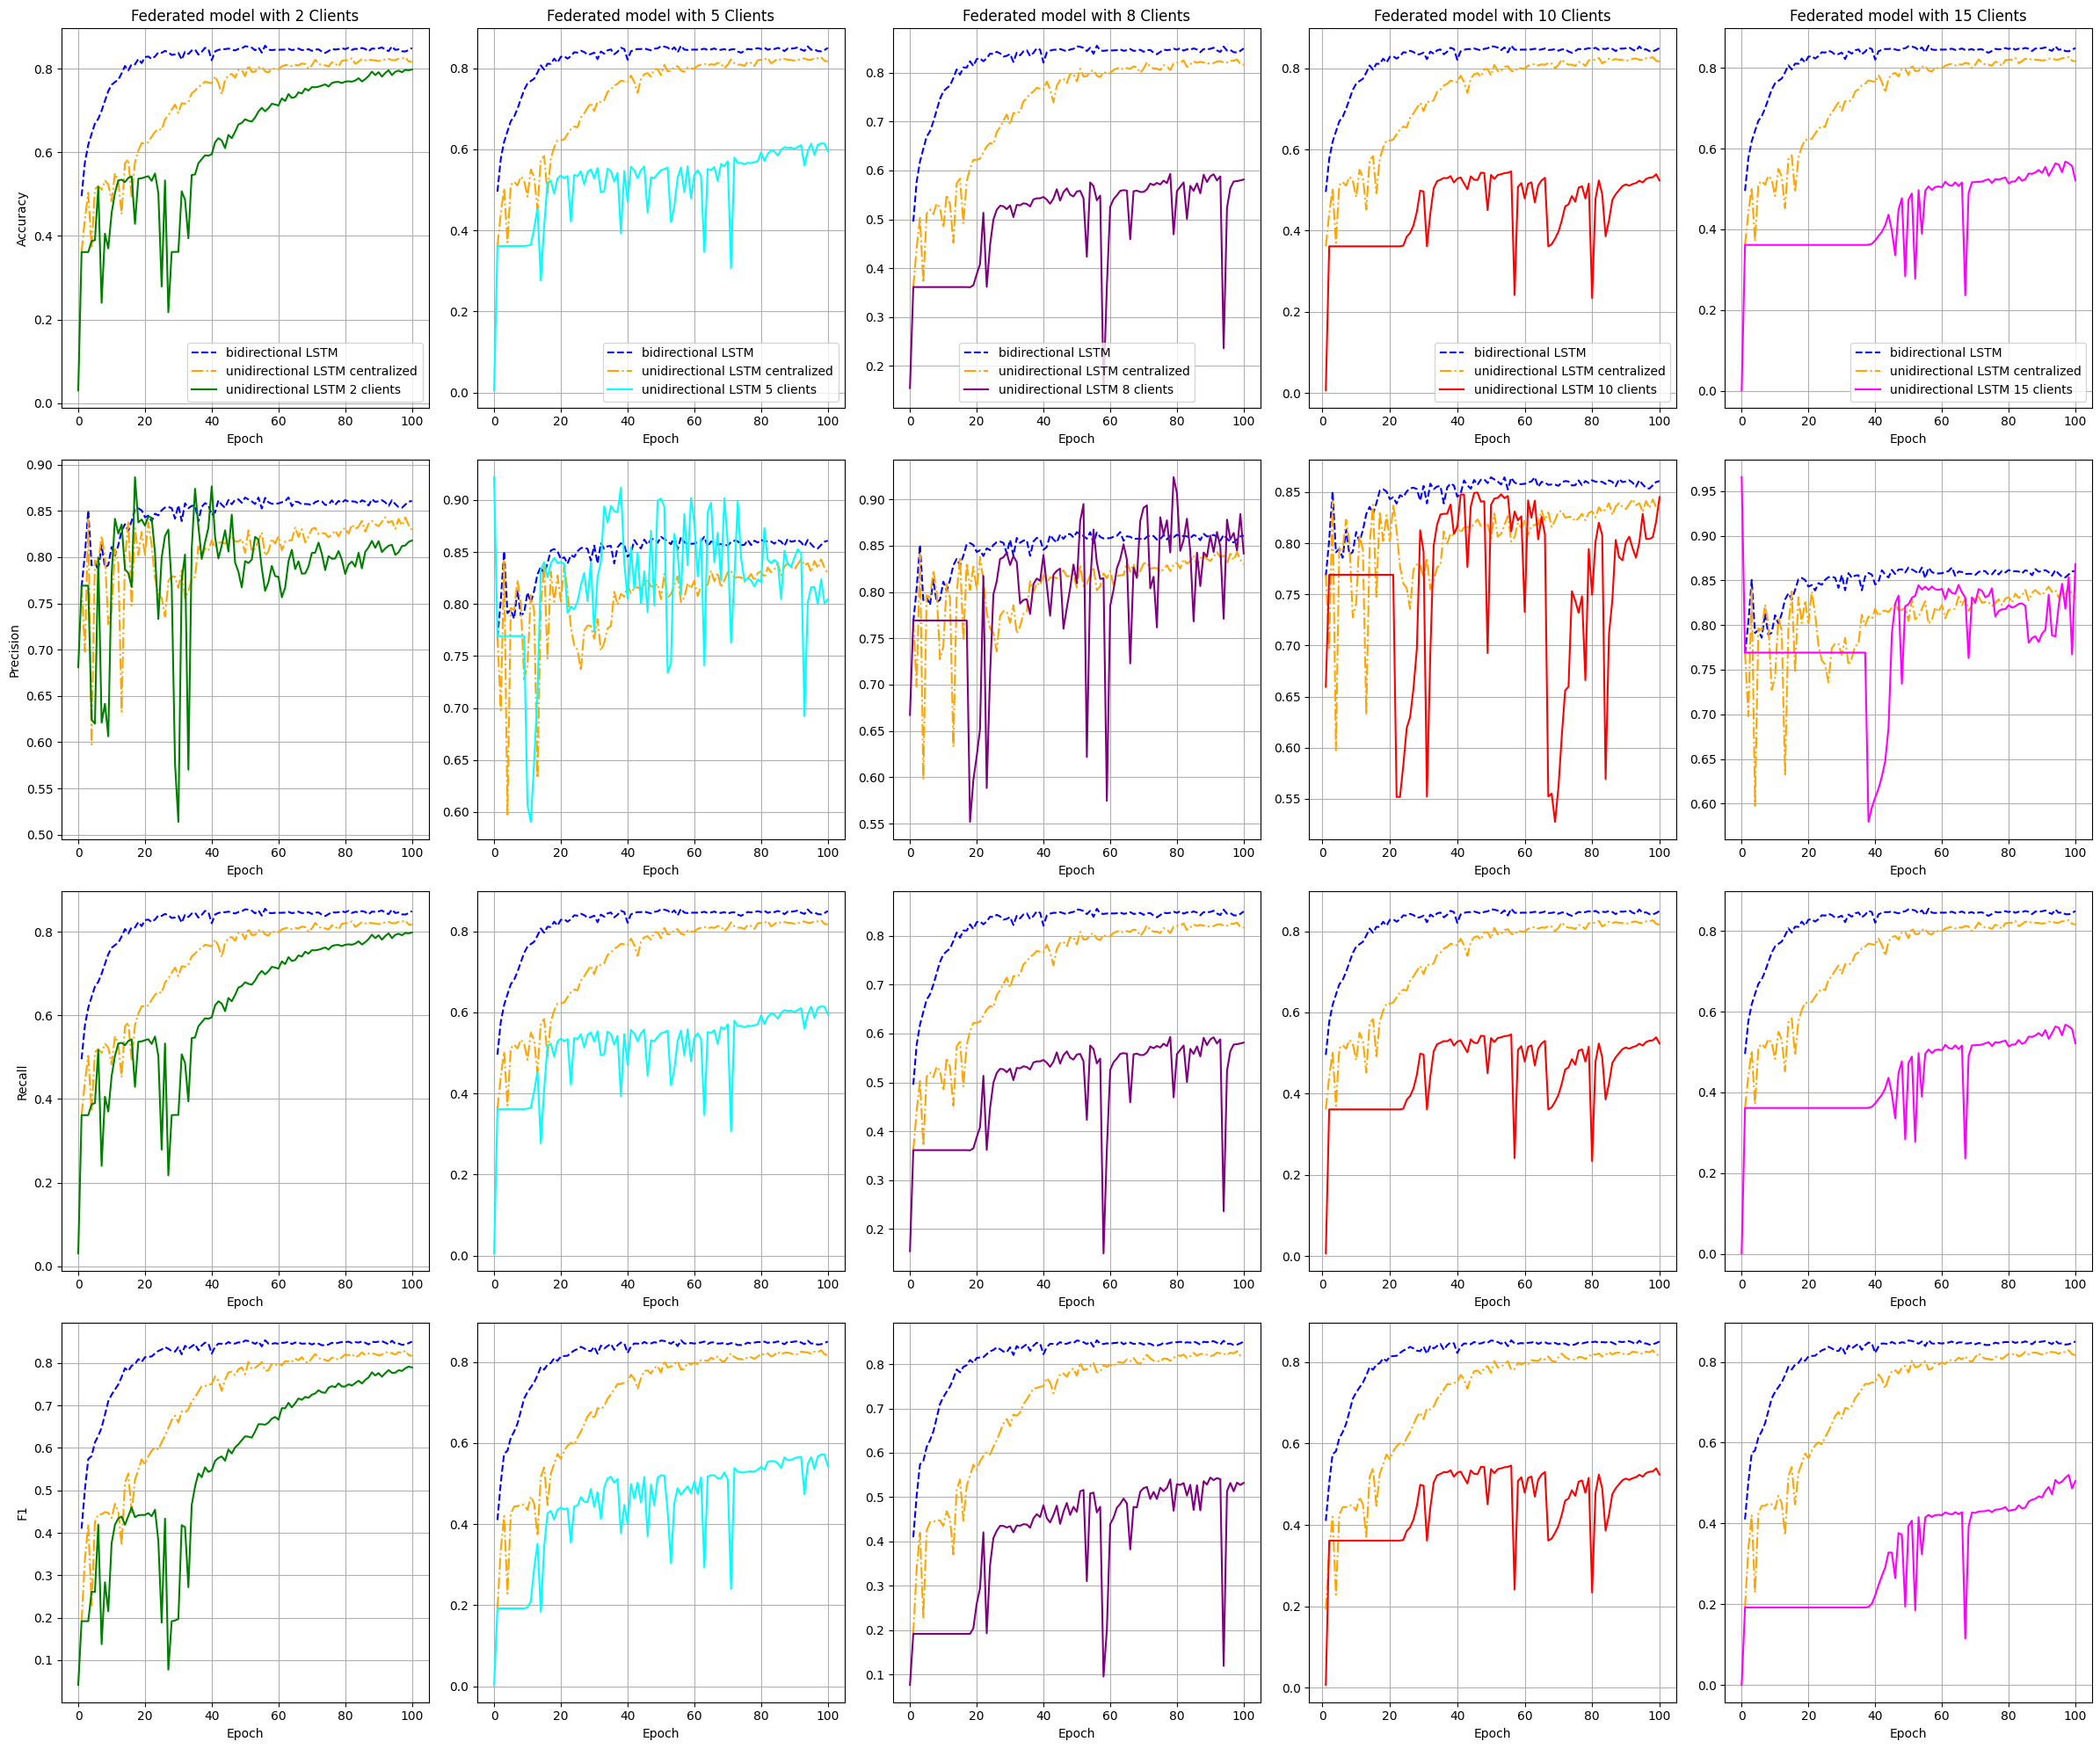

In [93]:
federated_dfs = [
    ("Federated model with 2 Clients", df_federated_2_clients, "2"),
    ("Federated model with 5 Clients", df_federated_5_clients, "5"),
    ("Federated model with 8 Clients", df_federated_8_clients, "8"),
    ("Federated model with 10 Clients", df_federated_10_clients, "10"),
    ("Federated model with 15 Clients", df_federated_15_clients, "15")
]

metrics = ['accuracy', 'precision', 'recall', 'f1']
colors = {
    'baseline': 'blue',
    'no_fed': 'orange',
    'Federated model with 2 Clients': 'green',
    'Federated model with 5 Clients': 'cyan',
    'Federated model with 8 Clients': 'purple',
    'Federated model with 10 Clients': 'red',
    'Federated model with 15 Clients': 'magenta'
}


fig, axs = plt.subplots(len(metrics), len(federated_dfs), figsize=(24, 20), sharey=False)

for row, metric in enumerate(metrics):
    for col, (federated_name, federated_df, clients) in enumerate(federated_dfs):
        ax = axs[row, col]
        
        # Plot baseline and no_fed for each metric with specified colors
        ax.plot(df_baseline['epoch_nr'], df_baseline[metric], label='bidirectional LSTM', color=colors['baseline'], linestyle='--')
        ax.plot(df_no_fed['epoch_nr'], df_no_fed[metric], label='unidirectional LSTM centralized', color=colors['no_fed'], linestyle='-.')
        
        # Plot the federated setup for the current metric with specified colors
        ax.plot(federated_df['epoch_nr'], federated_df[metric], label=f"unidirectional LSTM {clients} clients", color=colors[federated_name])
        
        ax.set_xlabel('Epoch')
        if col == 0:
            ax.set_ylabel(metric.capitalize())
        if row == 0:
            ax.set_title(federated_name)
        
        ax.grid(True)
        if row == 0:
            ax.legend()

plt.tight_layout()
plt.show()

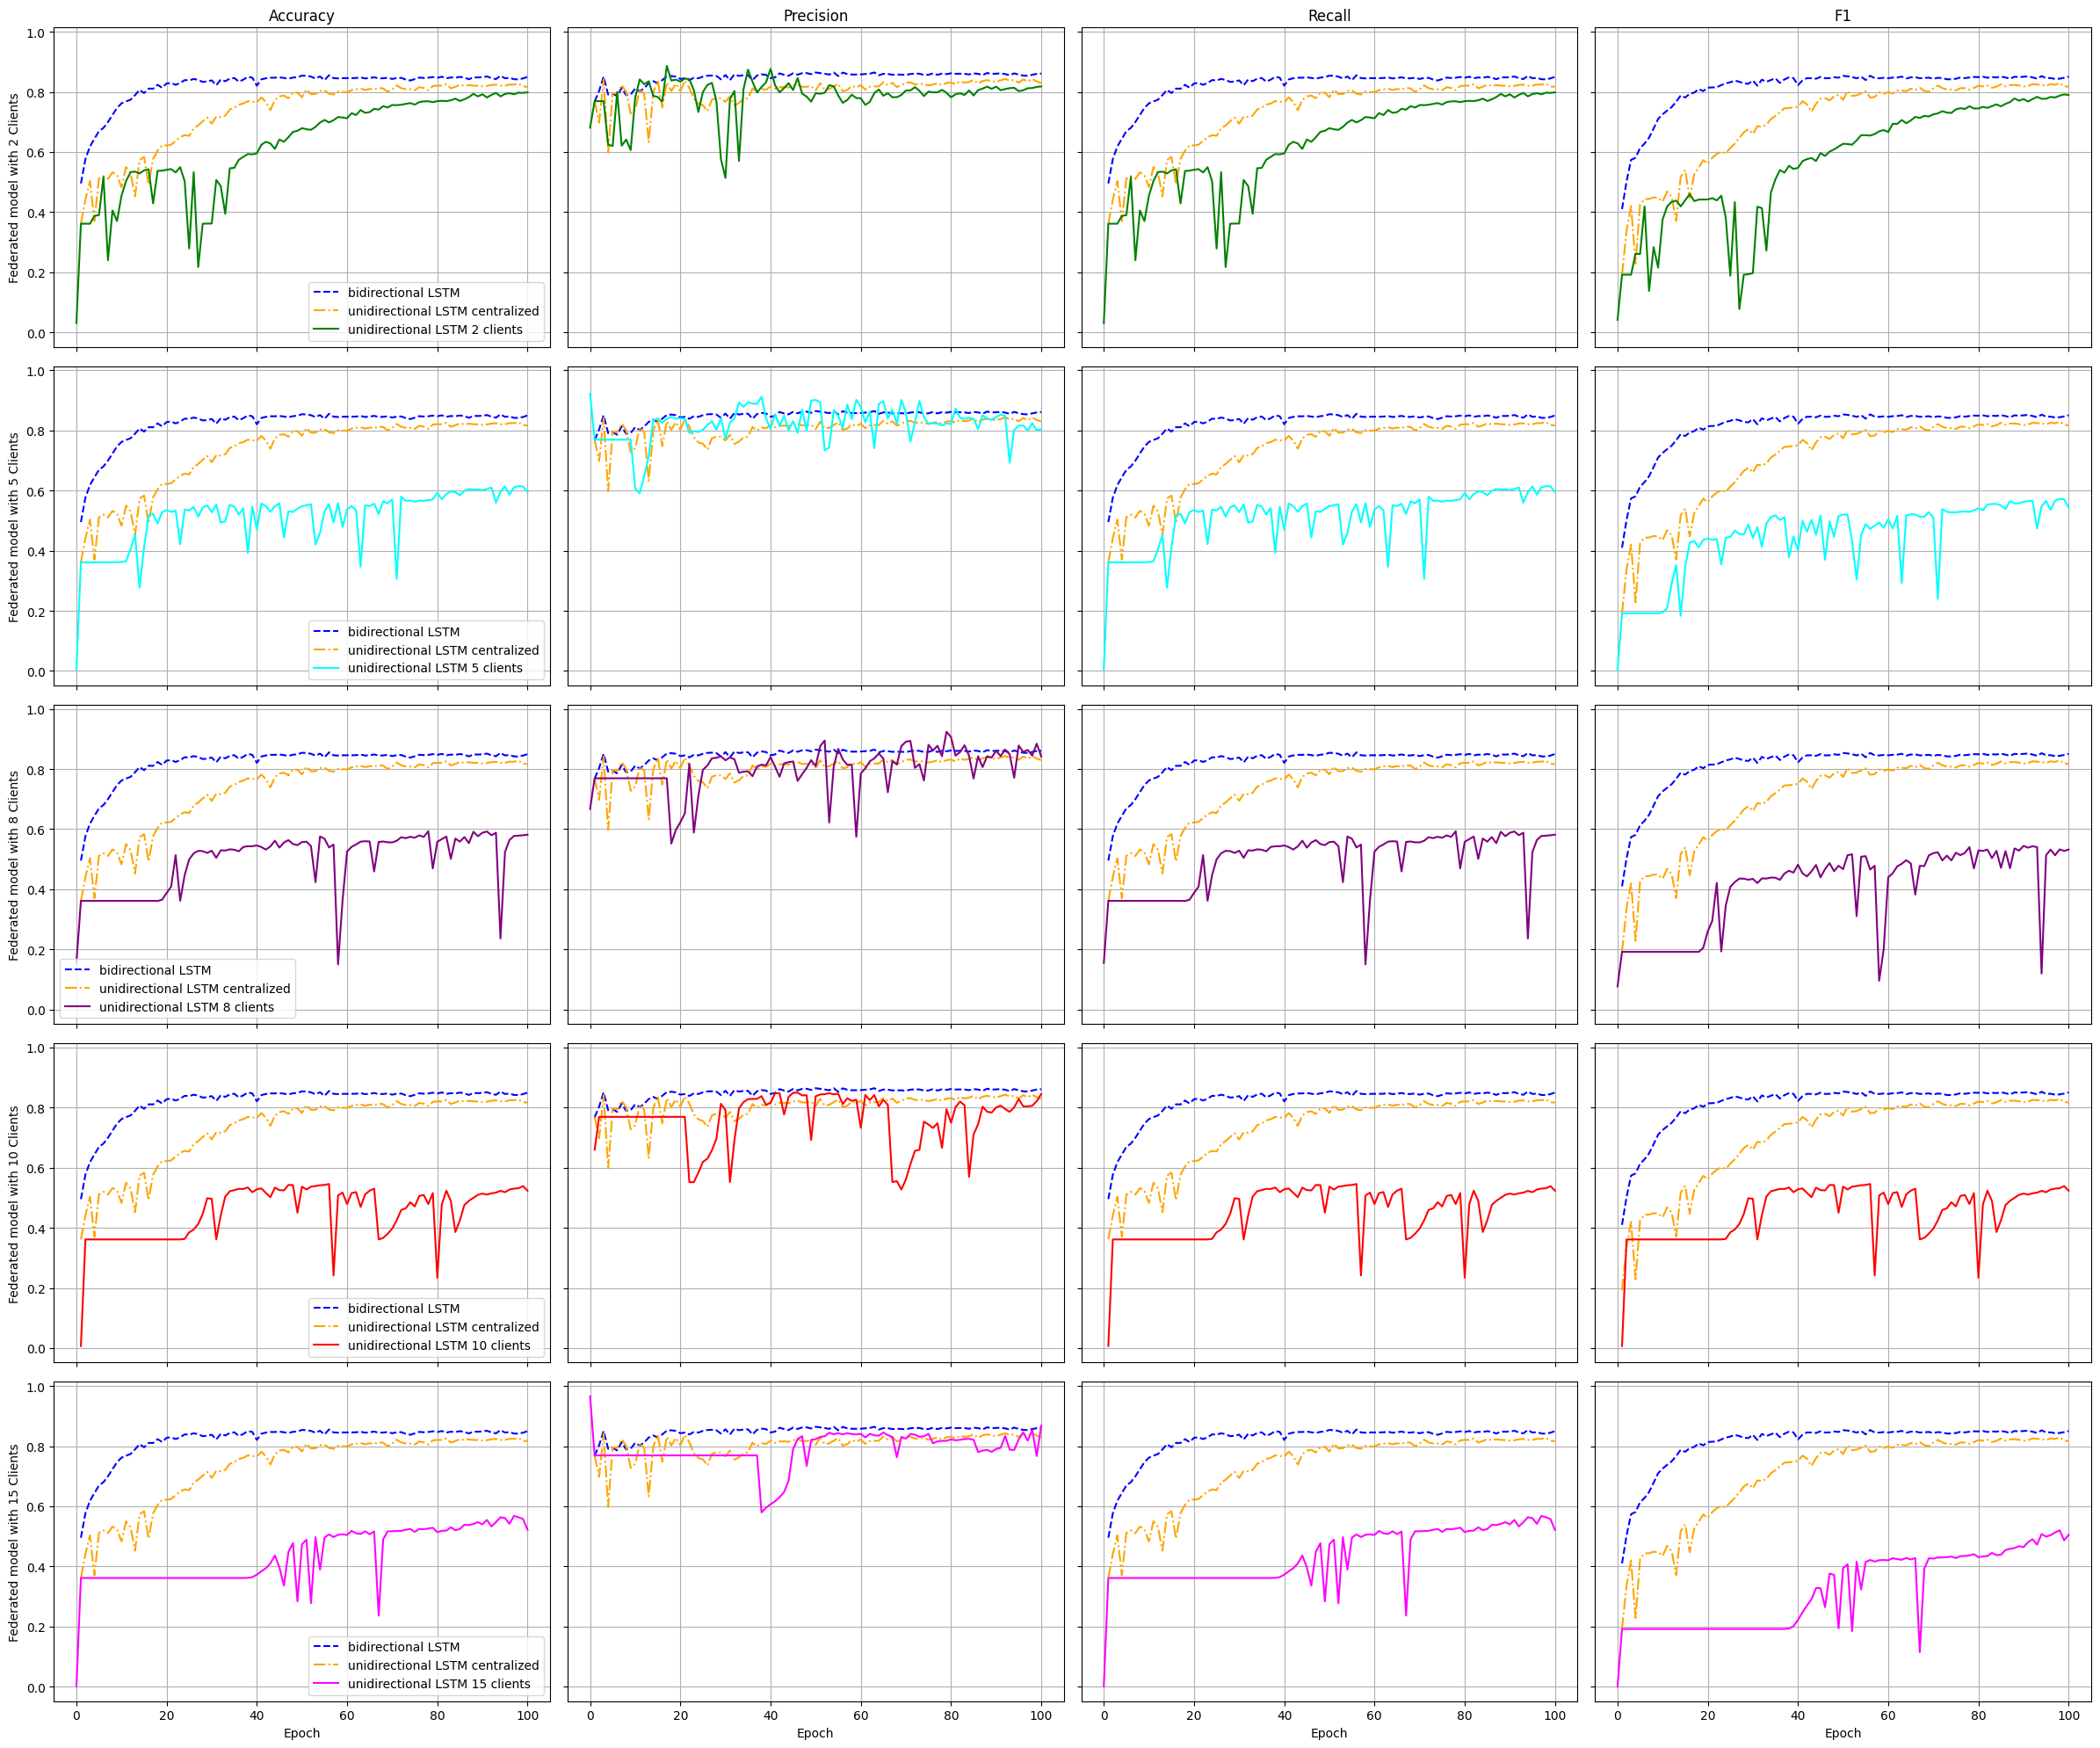

In [96]:
federated_dfs = [
    ("Federated model with 2 Clients", df_federated_2_clients, "2"),
    ("Federated model with 5 Clients", df_federated_5_clients, "5"),
    ("Federated model with 8 Clients", df_federated_8_clients, "8"),
    ("Federated model with 10 Clients", df_federated_10_clients, "10"),
    ("Federated model with 15 Clients", df_federated_15_clients, "15")
]

metrics = ['accuracy', 'precision', 'recall', 'f1']
colors = {
    'baseline': 'blue',
    'no_fed': 'orange',
    'Federated model with 2 Clients': 'green',
    'Federated model with 5 Clients': 'cyan',
    'Federated model with 8 Clients': 'purple',
    'Federated model with 10 Clients': 'red',
    'Federated model with 15 Clients': 'magenta'
}


fig, axs = plt.subplots(len(federated_dfs), len(metrics), figsize=(24, 20), sharex=True, sharey=True)
for row, (federated_name, federated_df, clients) in enumerate(federated_dfs):
    for col, metric in enumerate(metrics):
        ax = axs[row, col]
        
        ax.plot(df_baseline['epoch_nr'], df_baseline[metric], label='bidirectional LSTM', color=colors['baseline'], linestyle='--')
        ax.plot(df_no_fed['epoch_nr'], df_no_fed[metric], label='unidirectional LSTM centralized', color=colors['no_fed'], linestyle='-.')
        
        # Plot the federated setup for the current metric with specified colors
        ax.plot(federated_df['epoch_nr'], federated_df[metric], label=f"unidirectional LSTM {clients} clients", color=colors[federated_name])    
    
        if col == 0:
            ax.set_ylabel(federated_name)
        if row == len(federated_dfs) - 1:
            ax.set_xlabel('Epoch')
        if row == 0:
            ax.set_title(metric.capitalize())
        
        ax.grid(True)
        if col == 0:
            ax.legend()
            
plt.tight_layout()
plt.show()
